### Spect Heart Predict and Visualize Importance

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
import plotly.express as px
import plotly.graph_objects as go
import sklearn

### 1. Understanding the Dataset

In [7]:
df=pd.read_csv('spect_test.csv')

In [9]:
df

,OVERALL_DIAGNOSIS,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,67,68,73,78,65,63,67,60,63,...,61,56,76,75,74,77,76,74,59,68
1,1,75,74,71,71,62,58,70,64,71,...,66,62,68,69,69,66,64,58,57,52
2,1,83,64,66,67,67,74,74,72,64,...,67,64,69,63,68,54,65,64,43,42
3,1,72,66,65,65,64,61,71,78,73,...,69,68,68,63,71,72,65,63,58,60
4,1,62,60,69,61,63,63,70,68,70,...,66,66,58,56,72,73,71,64,49,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0,74,69,75,70,70,74,77,77,65,...,66,67,63,61,71,68,66,65,54,57
183,0,72,61,64,66,64,59,68,66,76,...,69,64,67,71,69,68,65,73,56,52
184,0,75,73,72,77,68,67,76,73,67,...,70,67,72,71,79,75,77,75,67,71
185,0,59,62,72,74,66,66,74,76,63,...,65,71,67,69,77,78,77,76,70,70


In [11]:
df.head()

,OVERALL_DIAGNOSIS,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,67,68,73,78,65,63,67,60,63,...,61,56,76,75,74,77,76,74,59,68
1,1,75,74,71,71,62,58,70,64,71,...,66,62,68,69,69,66,64,58,57,52
2,1,83,64,66,67,67,74,74,72,64,...,67,64,69,63,68,54,65,64,43,42
3,1,72,66,65,65,64,61,71,78,73,...,69,68,68,63,71,72,65,63,58,60
4,1,62,60,69,61,63,63,70,68,70,...,66,66,58,56,72,73,71,64,49,42


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   OVERALL_DIAGNOSIS  187 non-null    int64
 1   F1R                187 non-null    int64
 2   F1S                187 non-null    int64
 3   F2R                187 non-null    int64
 4   F2S                187 non-null    int64
 5   F3R                187 non-null    int64
 6   F3S                187 non-null    int64
 7   F4R                187 non-null    int64
 8   F4S                187 non-null    int64
 9   F5R                187 non-null    int64
 10  F5S                187 non-null    int64
 11  F6R                187 non-null    int64
 12  F6S                187 non-null    int64
 13  F7R                187 non-null    int64
 14  F7S                187 non-null    int64
 15  F8R                187 non-null    int64
 16  F8S                187 non-null    int64
 17  F9R             

In [15]:
df.isna()

,OVERALL_DIAGNOSIS,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
df.isna().sum()

OVERALL_DIAGNOSIS    0
F1R                  0
F1S                  0
F2R                  0
F2S                  0
F3R                  0
F3S                  0
F4R                  0
F4S                  0
F5R                  0
F5S                  0
F6R                  0
F6S                  0
F7R                  0
F7S                  0
F8R                  0
F8S                  0
F9R                  0
F9S                  0
F10R                 0
F10S                 0
F11R                 0
F11S                 0
F12R                 0
F12S                 0
F13R                 0
F13S                 0
F14R                 0
F14S                 0
F15R                 0
F15S                 0
F16R                 0
F16S                 0
F17R                 0
F17S                 0
F18R                 0
F18S                 0
F19R                 0
F19S                 0
F20R                 0
F20S                 0
F21R                 0
F21S                 0
F22R       

In [19]:
df.describe()

,OVERALL_DIAGNOSIS,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.919786,65.128342,63.786096,68.304813,68.320856,63.818182,62.374332,69.352941,68.534759,62.839572,...,63.358289,61.695187,65.090909,63.850267,64.390374,62.187166,60.770053,58.406417,51.128342,48.593583
std,0.272353,8.961963,10.157746,6.849231,9.046697,9.569165,10.069062,9.513631,10.614082,9.604879,...,8.673589,12.025874,7.980977,9.171545,13.241857,13.691778,15.516746,16.194568,13.350712,15.087756
min,0.000000,23.000000,21.000000,38.000000,34.000000,21.000000,25.000000,21.000000,20.000000,12.000000,...,18.000000,14.000000,33.000000,18.000000,11.000000,6.000000,5.000000,8.000000,13.000000,4.000000
25%,1.000000,61.000000,58.500000,64.000000,65.000000,60.000000,59.000000,67.000000,66.000000,60.500000,...,61.500000,60.000000,60.500000,59.000000,61.000000,58.000000,55.500000,53.500000,44.000000,42.000000
50%,1.000000,66.000000,65.000000,69.000000,70.000000,65.000000,64.000000,71.000000,71.000000,65.000000,...,66.000000,65.000000,66.000000,66.000000,68.000000,66.000000,66.000000,63.000000,55.000000,52.000000
75%,1.000000,71.000000,70.000000,73.000000,74.000000,70.000000,69.000000,75.000000,75.000000,68.000000,...,69.000000,69.000000,70.000000,70.000000,73.000000,71.000000,72.000000,69.000000,60.000000,60.000000
max,1.000000,83.000000,80.000000,82.000000,84.000000,82.000000,79.000000,85.000000,81.000000,76.000000,...,76.000000,77.000000,80.000000,79.000000,81.000000,81.000000,82.000000,82.000000,82.000000,71.000000


In [38]:
df.columns

Index(['OVERALL_DIAGNOSIS', 'F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R',
       'F4S', 'F5R', 'F5S', 'F6R', 'F6S', 'F7R', 'F7S', 'F8R', 'F8S', 'F9R',
       'F9S', 'F10R', 'F10S', 'F11R', 'F11S', 'F12R', 'F12S', 'F13R', 'F13S',
       'F14R', 'F14S', 'F15R', 'F15S', 'F16R', 'F16S', 'F17R', 'F17S', 'F18R',
       'F18S', 'F19R', 'F19S', 'F20R', 'F20S', 'F21R', 'F21S', 'F22R', 'F22S'],
      dtype='object')

### 2. Data Cleaning

### 2.1. Handle Missing Values

In [24]:
from sklearn.impute import SimpleImputer
num_imputer=SimpleImputer(strategy='mean')

In [26]:
df[['F1R','F1S']]=num_imputer.fit_transform(df[['F1R','F1S']])

In [30]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df[['F1R']] = cat_imputer.fit_transform(df[['F1R']])

### 2.2. Remove Duplicates

In [33]:
df.drop_duplicates(inplace=True)

### Outlier Detection (Optional)

Text(0.5, 1.0, 'box plot')

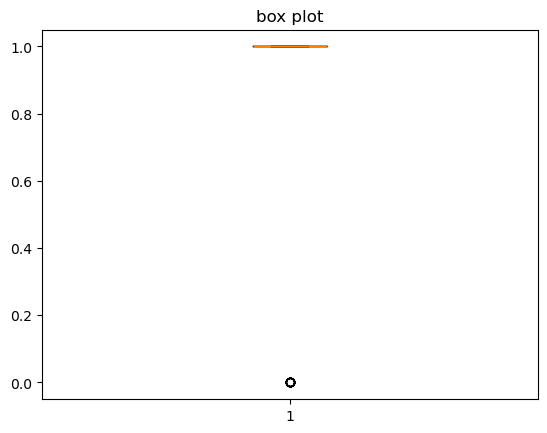

In [42]:
plt.boxplot(df['OVERALL_DIAGNOSIS'])
plt.title('box plot')

### 3. Data Transformation

### 3.1. Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder=oneHotEncoder(drop='fi')

In [46]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding for categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = pd.DataFrame(encoder.fit_transform(df[['cat_feature']]))

# Add the encoded categorical columns back to the dataset
df = pd.concat([df.drop('cat_feature', axis=1), encoded_features], axis=1)


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'